Tipos de Gráficos: Line Chart - Gráficos de Linha simples e múltiplos

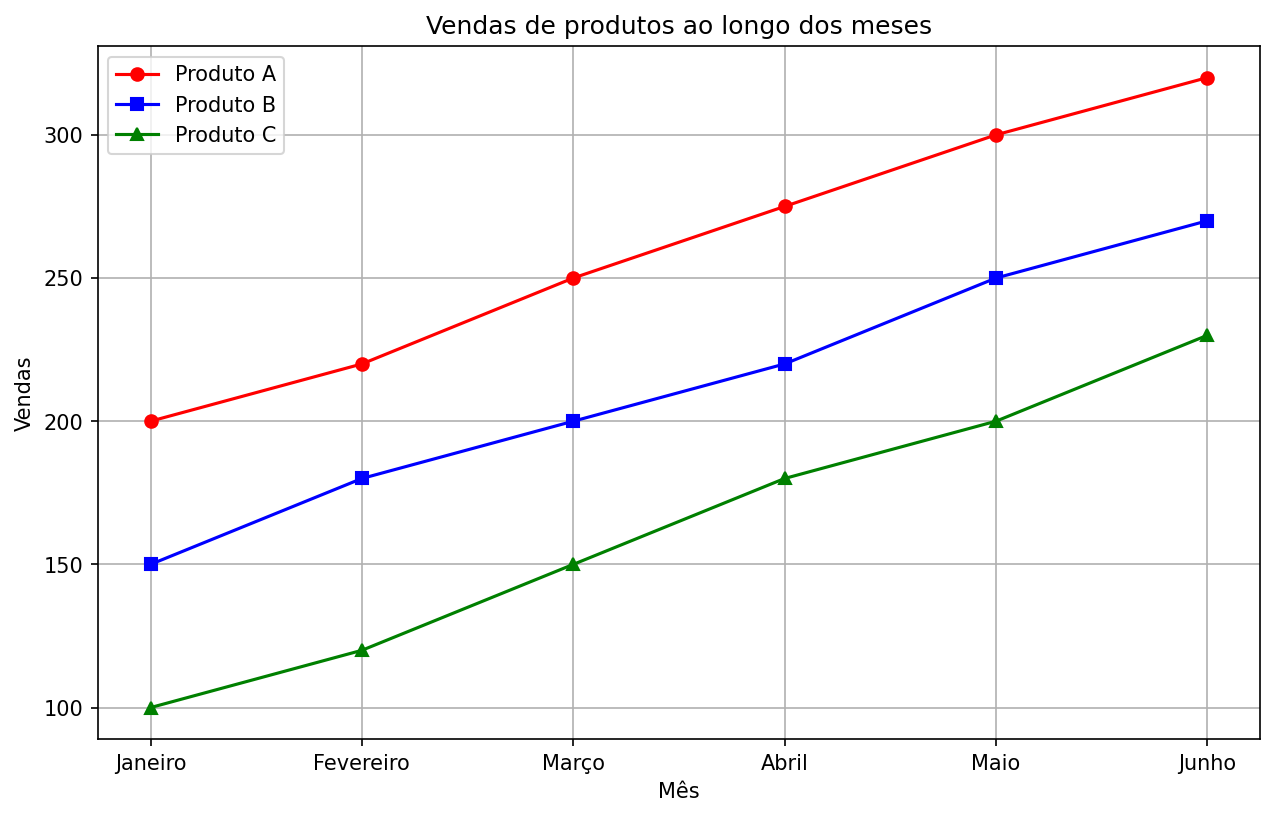

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

produtos = pd.read_csv('./produtos.csv')

plt.figure(figsize=(10,6),dpi=150)
# Plotando cada linha
plt.plot(produtos['Mes'],produtos['Produto A'],label='Produto A',marker='o',color='red')
plt.plot(produtos['Mes'],produtos['Produto B'],label='Produto B',marker='s',color='blue')
plt.plot(produtos['Mes'],produtos['Produto C'],label='Produto C',marker='^',color='green')
# Finalizar a personalização
plt.title('Vendas de produtos ao longo dos meses')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()



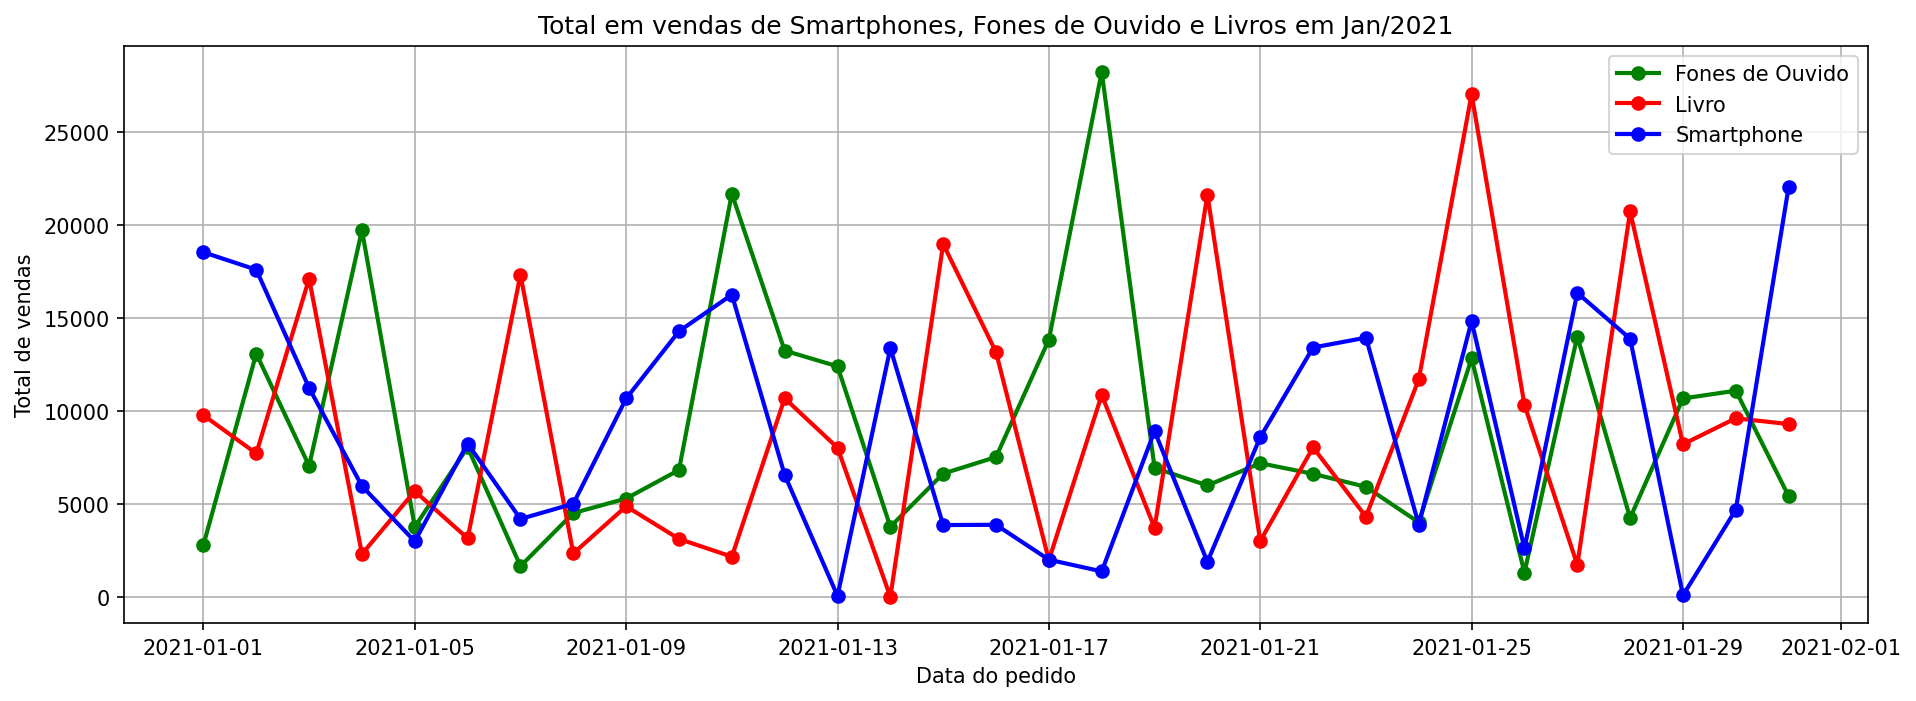

In [15]:
import matplotlib.pyplot as plt
import pandas as pd


dados_pedidos = pd.read_csv('./dados_vendas.csv')
# Eu quero todas as vendas que ocorreram no mês 1 de 2021, dos produtos Smartphone, Fones de Ouvido e Livro, além disso o parâmetro que será usado para análise é o Valor_Venda(total)
dados_pedidos['Data'] = pd.to_datetime(dados_pedidos['Data'])
vendas_filtradas = dados_pedidos[(dados_pedidos['Data'].dt.year == 2021) & (dados_pedidos['Data'].dt.month == 1) & (dados_pedidos['Produto'].isin(['Smartphone','Fones de Ouvido','Livro']))]
dados_pedidos.head(5)
# Data, Produto,Valor Venda
dados_agrupados = vendas_filtradas.groupby(['Data','Produto']).agg({'Valor_Venda':'sum'}).reset_index()
dados_agrupados.head(5)
# Pivot Table - Data - Produto 1, Produto 2, Produto 3
dados_pivot = dados_agrupados.pivot_table(index='Data',columns='Produto',values='Valor_Venda',fill_value=0)
dados_pivot.head(5)

# Personalizar o gráfico
plt.figure(figsize=(15,5),dpi=150)
plt.plot(dados_pivot.index,dados_pivot['Fones de Ouvido'],label='Fones de Ouvido',marker='o',linestyle='solid',linewidth=2,color='green')
plt.plot(dados_pivot.index,dados_pivot['Livro'],label='Livro',marker='o',linestyle='solid',linewidth=2,color='red')
plt.plot(dados_pivot.index,dados_pivot['Smartphone'],label='Smartphone',marker='o',linestyle='solid',linewidth=2,color='blue')

plt.title('Total em vendas de Smartphones, Fones de Ouvido e Livros em Jan/2021')
plt.xlabel('Data do pedido')
plt.ylabel('Total de vendas')
plt.legend()
plt.grid(True)
plt.show()
